# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


# Loading The Dataset

In [2]:
df = pd.read_csv(r'D:\ineuron\sales prediction\Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
# statistical info

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# datatype of attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# check unique values in dataset

df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the dataset

In [8]:
# check for null values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# check for categorical attributes

cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
        
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
# print the categorical columns

for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [12]:
# Filling the missing value

df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [13]:
df['Item_Weight'].isnull().sum()

0

In [14]:
outlet_size_mode = df.pivot_table(values= 'Outlet_Size', columns= 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [15]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
miss_bool= df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size']= df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
df['Outlet_Size'].isnull().sum()

0

In [18]:
sum(df['Item_Visibility']==0)

526

In [19]:
# replace zeros with mean

df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [20]:
sum(df['Item_Visibility']==0)

0

In [21]:
# Combine item fat content

df['Item_Fat_Content']= df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
#df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
#df['New_Item_Type']

In [23]:
#df['New_Item_Type'] = df['New_Item_Type'].map({'FD': 'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
#df['New_Item_Type'].value_counts()

In [24]:
#df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
#df['Item_Fat_Content'].value_counts()

# Exploratory Data Analysis

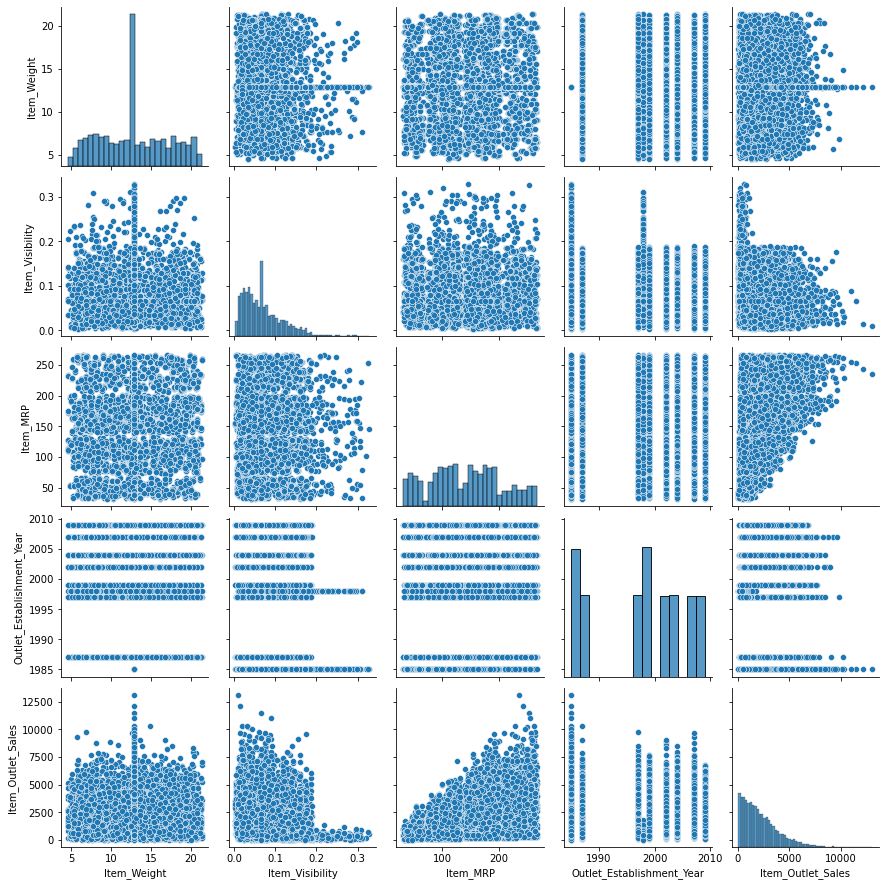

In [25]:
sns.pairplot(df)

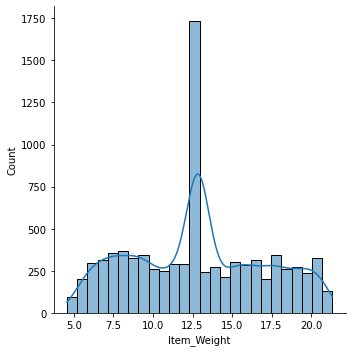

In [26]:
sns.displot(df['Item_Weight'], kde=True)

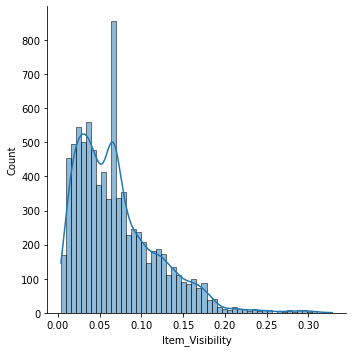

In [27]:
sns.displot(df['Item_Visibility'], kde=True)

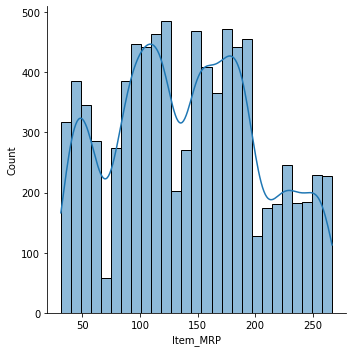

In [28]:
sns.displot(df['Item_MRP'], kde=True)

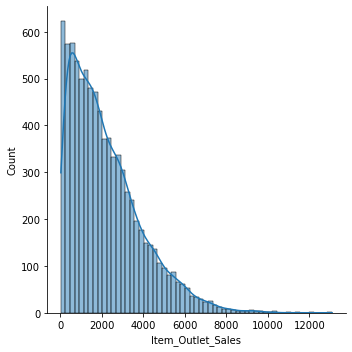

In [29]:
sns.displot(df['Item_Outlet_Sales'], kde=True)

In [30]:
# log transformation

df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

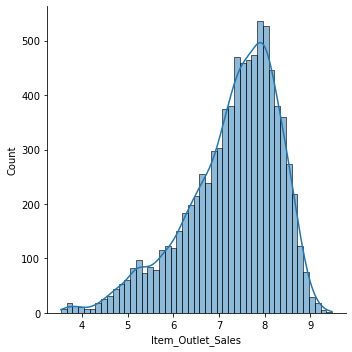

In [31]:
sns.displot(df['Item_Outlet_Sales'], kde=True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

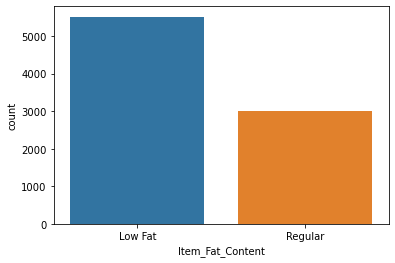

In [32]:
sns.countplot(df['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

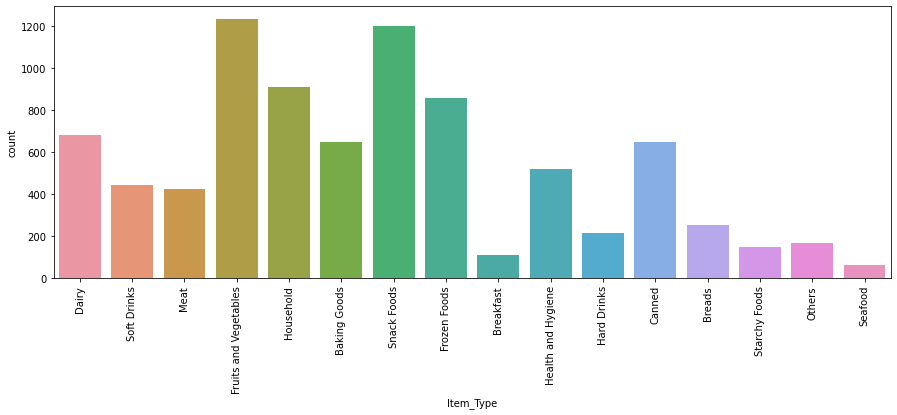

In [33]:
plt.figure(figsize=(15,5))
l= list(df['Item_Type'].unique())
chart = sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=l, rotation = 90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

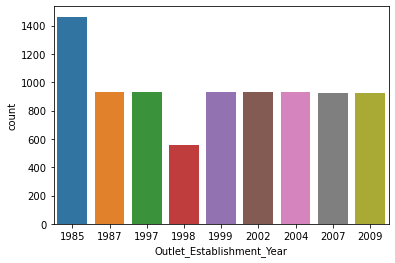

In [34]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

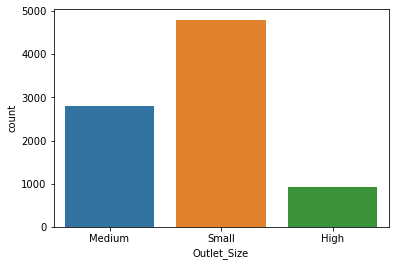

In [35]:
sns.countplot(df['Outlet_Size'])      

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

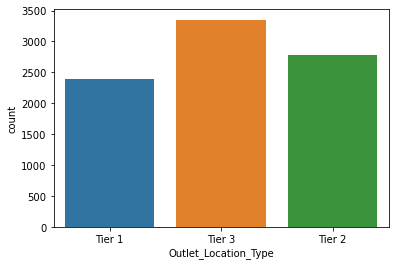

In [36]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

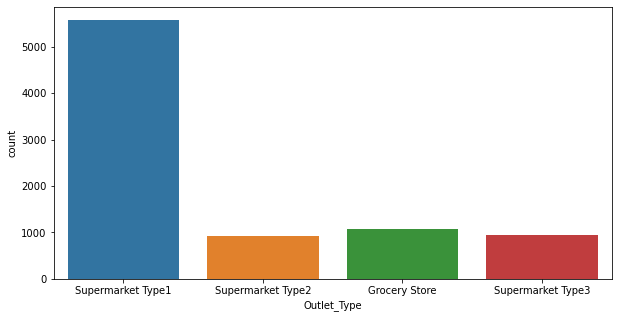

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Type'])

# Coorelation Matrix

<AxesSubplot:>

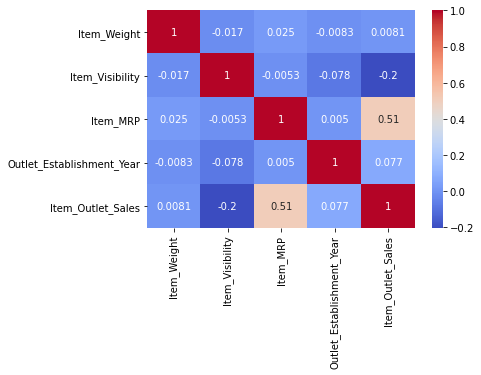

In [38]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Label Encoding

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

# Onehot Encoding

In [41]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,156,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,9,1,...,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,3,0,...,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,9,1,...,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,0,0,...,0,0,1,0,0,1,1,0,0,0
4,1297,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,1,1,...,1,0,0,0,0,1,0,1,0,0


In [42]:
df.to_csv('stored_sales.csv')

# Input Split

In [43]:
x = df.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Model Training

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred_lr = lr.predict(x_test)

In [50]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lr,x,y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)  

CV Score: 0.28898770704581467


# Metrics

In [51]:
from sklearn import metrics
R2 = metrics.r2_score(y_test,y_pred_lr)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr))

In [52]:
rmse

0.5325086094399243

In [53]:
R2

0.7302829579633738

# Decission Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt = DecisionTreeRegressor()

In [56]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [57]:
y_pred_dt = dt.predict(x_test)

In [58]:
y_pred_dt

array([7.70591226, 6.50747023, 6.34492242, ..., 6.34492242, 7.08961006,
       7.31258685])

In [59]:
y_test

7503    7.463974
2957    5.880166
7031    5.936239
1084    8.662069
856     7.765540
          ...   
7205    8.008063
3257    6.793287
6346    6.446007
6318    5.537350
6339    6.885232
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [60]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dt,x,y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)  

CV Score: 0.5787312746408813


In [61]:
from sklearn import metrics
R2 = metrics.r2_score(y_test,y_pred_dt)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt))


In [62]:
R2

0.4607666156377218

In [63]:
rmse

0.7529407903676986

# Random Tree Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf = RandomForestRegressor()
                          

In [66]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
y_pred_rf = rf.predict(x_test)

In [68]:
y_pred_rf

array([6.4521209 , 6.77443371, 6.43428554, ..., 6.51694745, 6.26603386,
       7.21602452])

In [69]:
y_test

7503    7.463974
2957    5.880166
7031    5.936239
1084    8.662069
856     7.765540
          ...   
7205    8.008063
3257    6.793287
6346    6.446007
6318    5.537350
6339    6.885232
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [70]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf,x,y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)  

CV Score: 0.3102870947253944


In [71]:
from sklearn import metrics
R2 = metrics.r2_score(y_test,y_pred_rf)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))

In [72]:
R2

0.7187063998917382

In [73]:
rmse

0.5438164810688939

# ExtraTreesRegressor

In [74]:
from sklearn.ensemble import ExtraTreesRegressor

In [75]:
et = ExtraTreesRegressor()

In [76]:
et.fit(x_train, y_train)

ExtraTreesRegressor()

In [77]:
y_pred_et = et.predict(x_test)

In [78]:
y_pred_et

array([6.40482314, 6.80653667, 6.56317743, ..., 6.36700707, 5.91033915,
       7.23165612])

In [79]:
y_test

7503    7.463974
2957    5.880166
7031    5.936239
1084    8.662069
856     7.765540
          ...   
7205    8.008063
3257    6.793287
6346    6.446007
6318    5.537350
6339    6.885232
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [80]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(et,x,y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)  

CV Score: 0.32694647363129825


In [81]:
from sklearn import metrics
R2 = metrics.r2_score(y_test,y_pred_et)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_et))

In [82]:
R2

0.7018983311502716

In [83]:
rmse

0.5598280350971712

# Gradinent Boosting

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
gb = GradientBoostingRegressor()

In [86]:
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [87]:
y_pred_gb = gb.predict(x_test)

In [88]:
y_pred_gb

array([6.97497572, 6.48297904, 6.44364726, ..., 6.40790207, 6.38341756,
       7.28704579])

In [89]:
y_test

7503    7.463974
2957    5.880166
7031    5.936239
1084    8.662069
856     7.765540
          ...   
7205    8.008063
3257    6.793287
6346    6.446007
6318    5.537350
6339    6.885232
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [90]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gb,x,y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)  

CV Score: 0.27283771630687137


In [91]:
from sklearn import metrics
R2 = metrics.r2_score(y_test,y_pred_gb)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_gb))

In [92]:
R2

0.7430266085804758

In [93]:
import pickle

In [94]:
filename = 'sales prediction-gb-model.pkl'
pickle.dump(gb, open(filename, 'wb'))

In [95]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model = gb.predict(x_test)

In [96]:
loaded_model

array([6.97497572, 6.48297904, 6.44364726, ..., 6.40790207, 6.38341756,
       7.28704579])